## A toy example : MNIST-fashion

Let's illustrate with a toy example : MNIST fashion.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import torchvision
import torchvision.transforms as transforms
import torch

2025-01-31 17:07:37.538933: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-31 17:07:37.614809: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.FashionMNIST(root='./fashion_mnist', train=True, download=False, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./fashion_mnist', train=False, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

Let's visualize the data.

In [ ]:
from autoaugment import utils

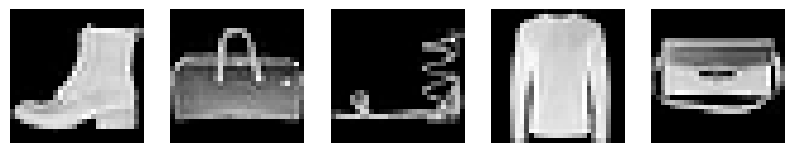

In [ ]:
utils.show_images(train_set)

## Training of a CNN

Let's train a simple Convolutional Neural Network on the MNIST-Fashion dataset.

In [ ]:
import torch.nn as nn
import torch.optim as optim

from simple_cnn import SimpleCNN, train_model

In [ ]:
# Let's initialize the model.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Now, let's train this model on the raw data.

In [ ]:
epochs=10
train_model(model=model, train_loader=train_loader, test_loader=test_loader, device=device, optimizer=optimizer, criterion=criterion, epochs=epochs)

 10%|█         | 1/10 [00:21<03:14, 21.60s/it]

Epoch 1/10 - Loss: 442.4159 - Acc: 0.8303


 20%|██        | 2/10 [00:45<03:02, 22.83s/it]

Epoch 2/10 - Loss: 284.7380 - Acc: 0.8894


 30%|███       | 3/10 [01:09<02:43, 23.30s/it]

Epoch 3/10 - Loss: 237.3947 - Acc: 0.9061


 40%|████      | 4/10 [01:33<02:21, 23.57s/it]

Epoch 4/10 - Loss: 205.7883 - Acc: 0.9197


 50%|█████     | 5/10 [01:57<01:58, 23.69s/it]

Epoch 5/10 - Loss: 182.2619 - Acc: 0.9281


 60%|██████    | 6/10 [02:21<01:35, 23.80s/it]

Epoch 6/10 - Loss: 161.4474 - Acc: 0.9362


 70%|███████   | 7/10 [02:46<01:13, 24.38s/it]

Epoch 7/10 - Loss: 143.3134 - Acc: 0.9429


 80%|████████  | 8/10 [03:13<00:50, 25.07s/it]

Epoch 8/10 - Loss: 126.6581 - Acc: 0.9511


 90%|█████████ | 9/10 [03:38<00:25, 25.30s/it]

Epoch 9/10 - Loss: 109.4312 - Acc: 0.9566


100%|██████████| 10/10 [04:02<00:00, 24.29s/it]

Epoch 10/10 - Loss: 96.3693 - Acc: 0.9621


Introduire un cas pratique de vision par ordinateur
- Pourquoi a-t-on besoin d'augmenter la donnée dans ce cas ?

In [ ]:
x_train[0].shape

(28, 28)